In [2]:
import pandas as pd
df=pd.read_csv(r"D:\Excel\BlinkIT.csv")
print(df)

     Item Fat Content Item Identifier              Item Type  \
0             Regular           FDX32  Fruits and Vegetables   
1             Low Fat           NCB42     Health and Hygiene   
2             Regular           FDR28           Frozen Foods   
3             Regular           FDL50                 Canned   
4             Low Fat           DRI25            Soft Drinks   
...               ...             ...                    ...   
8518          low fat           NCT53     Health and Hygiene   
8519          low fat           FDN09            Snack Foods   
8520          low fat           DRE13            Soft Drinks   
8521              reg           FDT50                  Dairy   
8522              reg           FDM58            Snack Foods   

      Outlet Establishment Year Outlet Identifier Outlet Location Type  \
0                          2012            OUT049               Tier 1   
1                          2022            OUT018               Tier 3   
2        

In [3]:
df.shape

(8523, 12)

In [4]:
df.head()

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0


In [5]:
df

,Item Fat Content,Item Identifier,Item Type,Outlet Establishment Year,Outlet Identifier,Outlet Location Type,Outlet Size,Outlet Type,Item Visibility,Item Weight,Sales,Rating
0,Regular,FDX32,Fruits and Vegetables,2012,OUT049,Tier 1,Medium,Supermarket Type1,0.100014,15.10,145.4786,5.0
1,Low Fat,NCB42,Health and Hygiene,2022,OUT018,Tier 3,Medium,Supermarket Type2,0.008596,11.80,115.3492,5.0
2,Regular,FDR28,Frozen Foods,2016,OUT046,Tier 1,Small,Supermarket Type1,0.025896,13.85,165.0210,5.0
3,Regular,FDL50,Canned,2014,OUT013,Tier 3,High,Supermarket Type1,0.042278,12.15,126.5046,5.0
4,Low Fat,DRI25,Soft Drinks,2015,OUT045,Tier 2,Small,Supermarket Type1,0.033970,19.60,55.1614,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,low fat,NCT53,Health and Hygiene,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.000000,NaN,164.5526,4.0
8519,low fat,FDN09,Snack Foods,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.034706,NaN,241.6828,4.0
8520,low fat,DRE13,Soft Drinks,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.027571,NaN,86.6198,4.0
8521,reg,FDT50,Dairy,2018,OUT027,Tier 3,Medium,Supermarket Type3,0.107715,NaN,97.8752,4.0


In [8]:
print(f"Dataset shape: {df.shape}")
print(f"\nColumn names:\n{df.columns.tolist()}")
print(f"\nData types:\n{df.dtypes}")

Dataset shape: (8523, 12)

Column names:
['Item Fat Content', 'Item Identifier', 'Item Type', 'Outlet Establishment Year', 'Outlet Identifier', 'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility', 'Item Weight', 'Sales', 'Rating']

Data types:
Item Fat Content              object
Item Identifier               object
Item Type                     object
Outlet Establishment Year      int64
Outlet Identifier             object
Outlet Location Type          object
Outlet Size                   object
Outlet Type                   object
Item Visibility              float64
Item Weight                  float64
Sales                        float64
Rating                       float64
dtype: object


In [9]:
df.isnull().sum()

Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Sales                           0
Rating                          0
dtype: int64

In [12]:
print(f"\n2. Duplicate rows: {df.duplicated().sum()}")
if df.duplicated().sum() > 0:
    df.drop_duplicates(inplace=True)
    print("Removed duplicate rows")


2. Duplicate rows: 0


In [13]:
# Handle missing values in Item Weight - Fixed to avoid pandas warning
if df['Item Weight'].isnull().sum() > 0:
    median_weight = df['Item Weight'].median()
    df.loc[:, 'Item Weight'] = df['Item Weight'].fillna(median_weight)
    print(f"Filled {1463} missing Item Weight values with median: {median_weight:.2f}")
    print(f"Remaining missing values: {df['Item Weight'].isnull().sum()}")
else:
    print("No missing values in Item Weight")

No missing values in Item Weight


In [14]:
# 3. Data type corrections
print("\n3. Data Type Corrections:")
# Outlet Establishment Year is already int64, so no conversion needed
print(f"Outlet Establishment Year type: {df['Outlet Establishment Year'].dtype}")



3. Data Type Corrections:
Outlet Establishment Year type: int64


In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

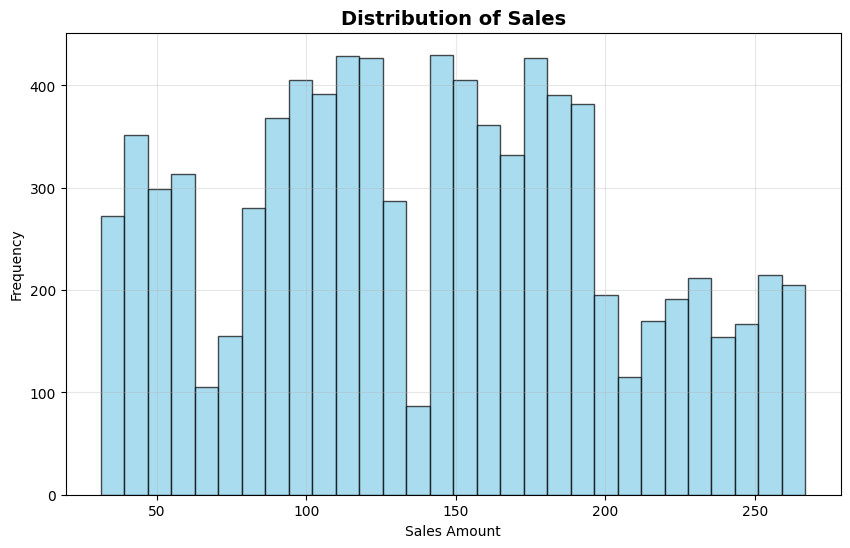

In [17]:
# 1. Sales Distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Sales'], bins=30, color='skyblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Sales', fontsize=14, fontweight='bold')
plt.xlabel('Sales Amount')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

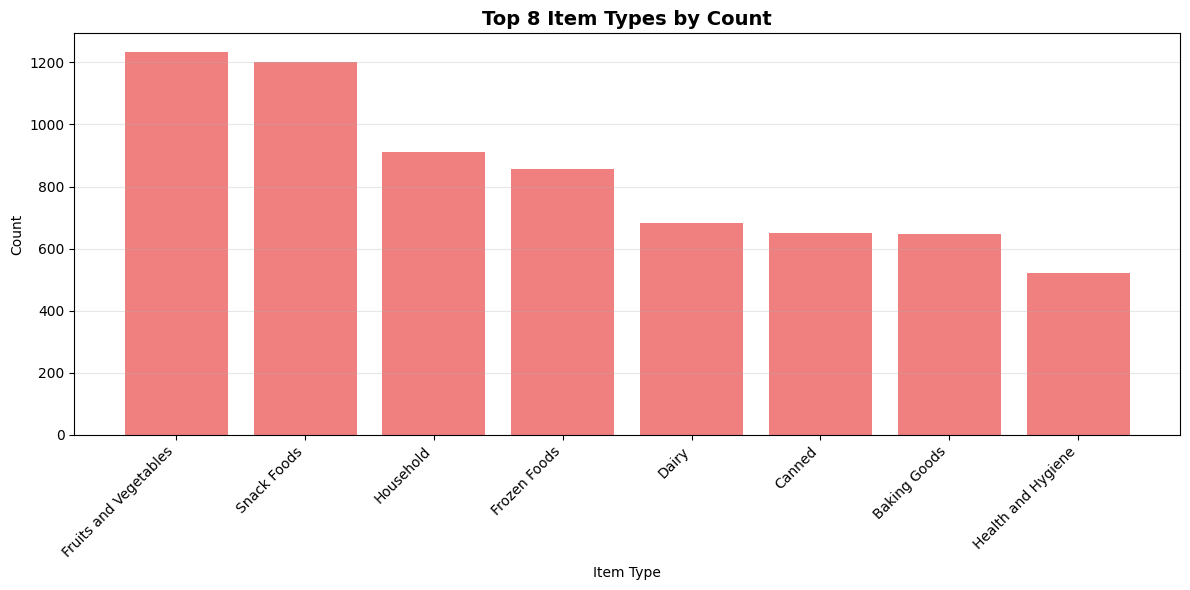

In [18]:
# 2. Top Item Types by Count
plt.figure(figsize=(12, 6))
top_items = df['Item Type'].value_counts().head(8)
plt.bar(range(len(top_items)), top_items.values, color='lightcoral')
plt.title('Top 8 Item Types by Count', fontsize=14, fontweight='bold')
plt.xlabel('Item Type')
plt.ylabel('Count')
plt.xticks(range(len(top_items)), top_items.index, rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

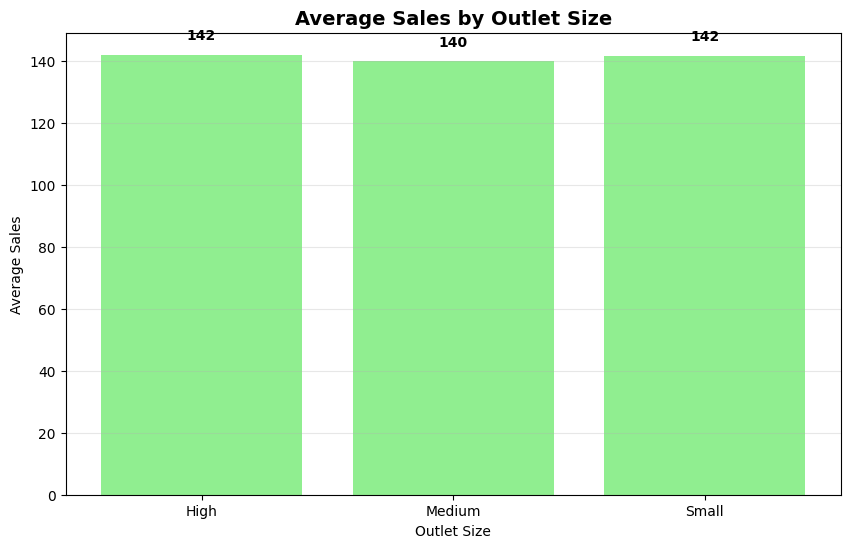

In [19]:
# 3. Sales by Outlet Size
plt.figure(figsize=(10, 6))
outlet_sales = df.groupby('Outlet Size')['Sales'].mean()
plt.bar(outlet_sales.index, outlet_sales.values, color='lightgreen')
plt.title('Average Sales by Outlet Size', fontsize=14, fontweight='bold')
plt.xlabel('Outlet Size')
plt.ylabel('Average Sales')
plt.grid(True, alpha=0.3, axis='y')
for i, v in enumerate(outlet_sales.values):
    plt.text(i, v + 5, f'{v:.0f}', ha='center', fontweight='bold')
plt.show()

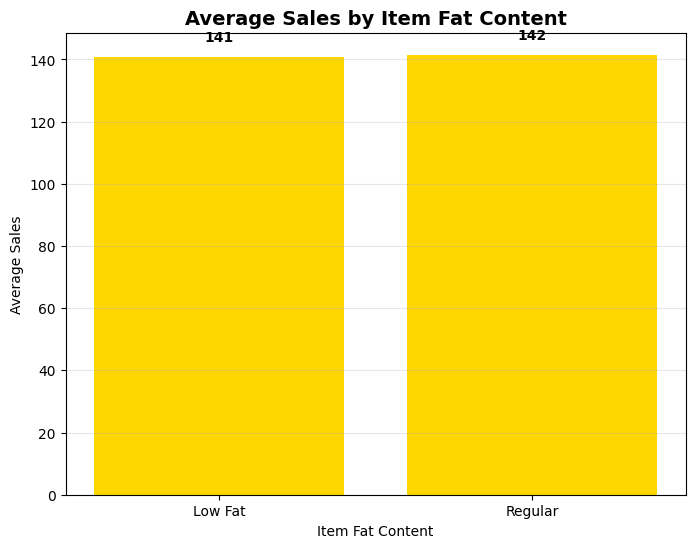

In [20]:
# 4. Sales by Item Fat Content
plt.figure(figsize=(8, 6))
fat_sales = df.groupby('Item Fat Content')['Sales'].mean()
plt.bar(fat_sales.index, fat_sales.values, color='gold')
plt.title('Average Sales by Item Fat Content', fontsize=14, fontweight='bold')
plt.xlabel('Item Fat Content')
plt.ylabel('Average Sales')
plt.grid(True, alpha=0.3, axis='y')
for i, v in enumerate(fat_sales.values):
    plt.text(i, v + 5, f'{v:.0f}', ha='center', fontweight='bold')
plt.show()

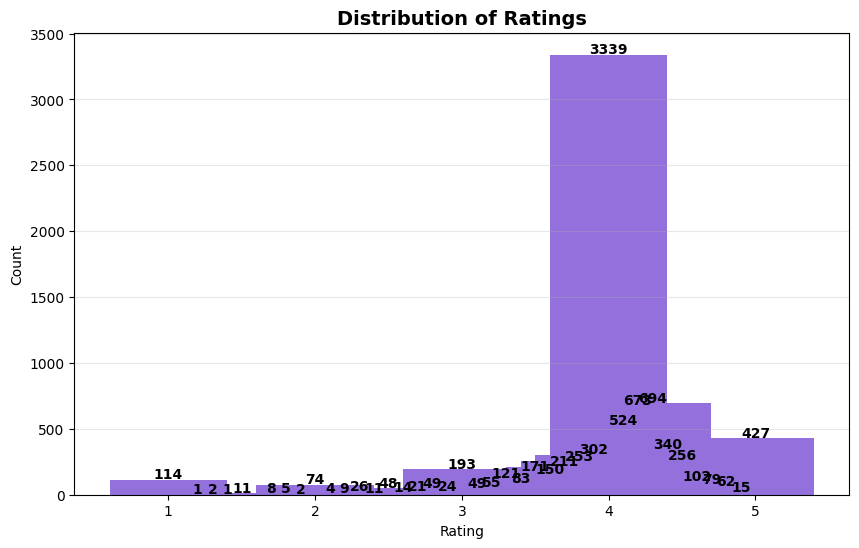

In [21]:
# 5. Rating Distribution
plt.figure(figsize=(10, 6))
rating_counts = df['Rating'].value_counts().sort_index()
plt.bar(rating_counts.index, rating_counts.values, color='mediumpurple')
plt.title('Distribution of Ratings', fontsize=14, fontweight='bold')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.grid(True, alpha=0.3, axis='y')
for i, v in zip(rating_counts.index, rating_counts.values):
    plt.text(i, v + 10, str(v), ha='center', fontweight='bold')
plt.show()

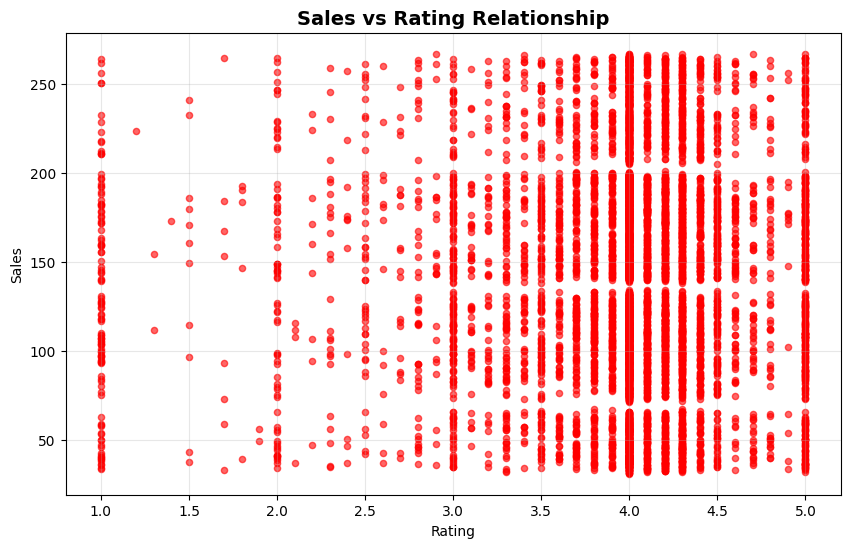

In [22]:
# 6. Sales vs Rating Relationship
plt.figure(figsize=(10, 6))
plt.scatter(df['Rating'], df['Sales'], alpha=0.6, color='red', s=20)
plt.title('Sales vs Rating Relationship', fontsize=14, fontweight='bold')
plt.xlabel('Rating')
plt.ylabel('Sales')
plt.grid(True, alpha=0.3)
plt.show()

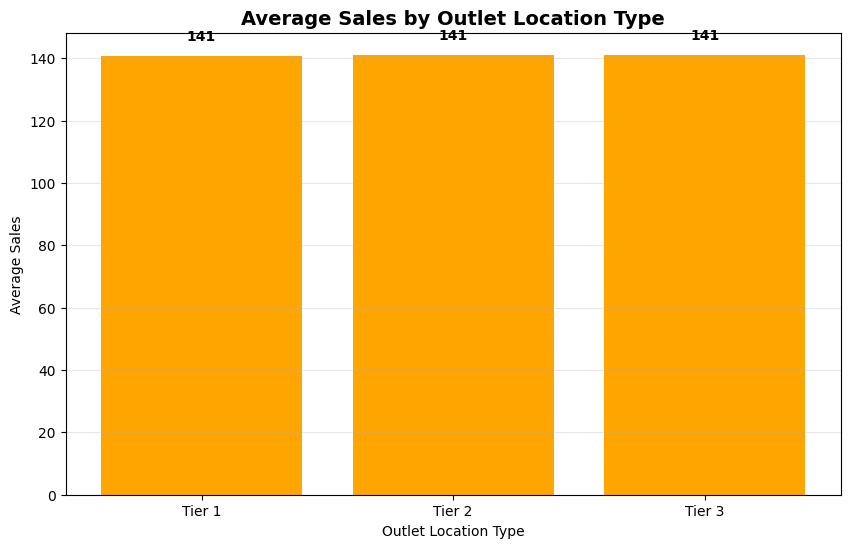

In [23]:
# 7. Outlet Location Performance
plt.figure(figsize=(10, 6))
location_sales = df.groupby('Outlet Location Type')['Sales'].mean()
plt.bar(location_sales.index, location_sales.values, color='orange')
plt.title('Average Sales by Outlet Location Type', fontsize=14, fontweight='bold')
plt.xlabel('Outlet Location Type')
plt.ylabel('Average Sales')
plt.grid(True, alpha=0.3, axis='y')
for i, v in enumerate(location_sales.values):
    plt.text(i, v + 5, f'{v:.0f}', ha='center', fontweight='bold')
plt.show()

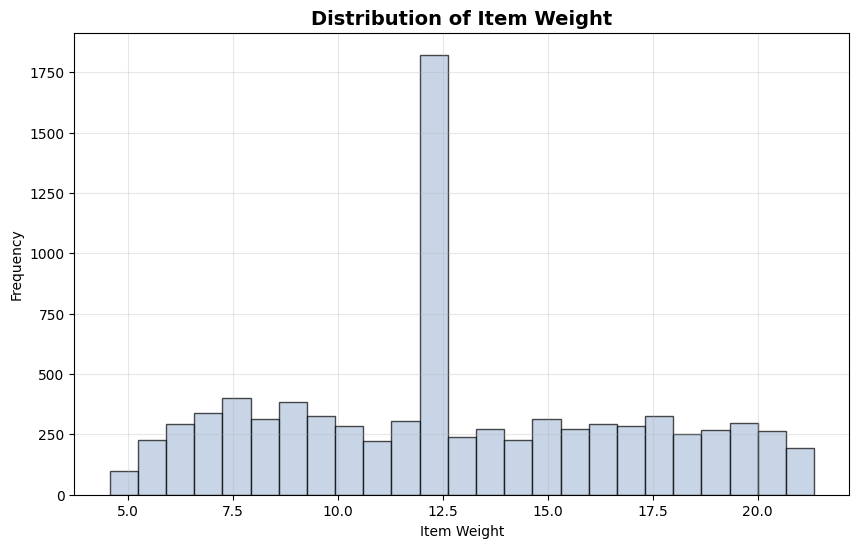

In [24]:
# 8. Item Weight Distribution
plt.figure(figsize=(10, 6))
plt.hist(df['Item Weight'], bins=25, color='lightsteelblue', edgecolor='black', alpha=0.7)
plt.title('Distribution of Item Weight', fontsize=14, fontweight='bold')
plt.xlabel('Item Weight')
plt.ylabel('Frequency')
plt.grid(True, alpha=0.3)
plt.show()

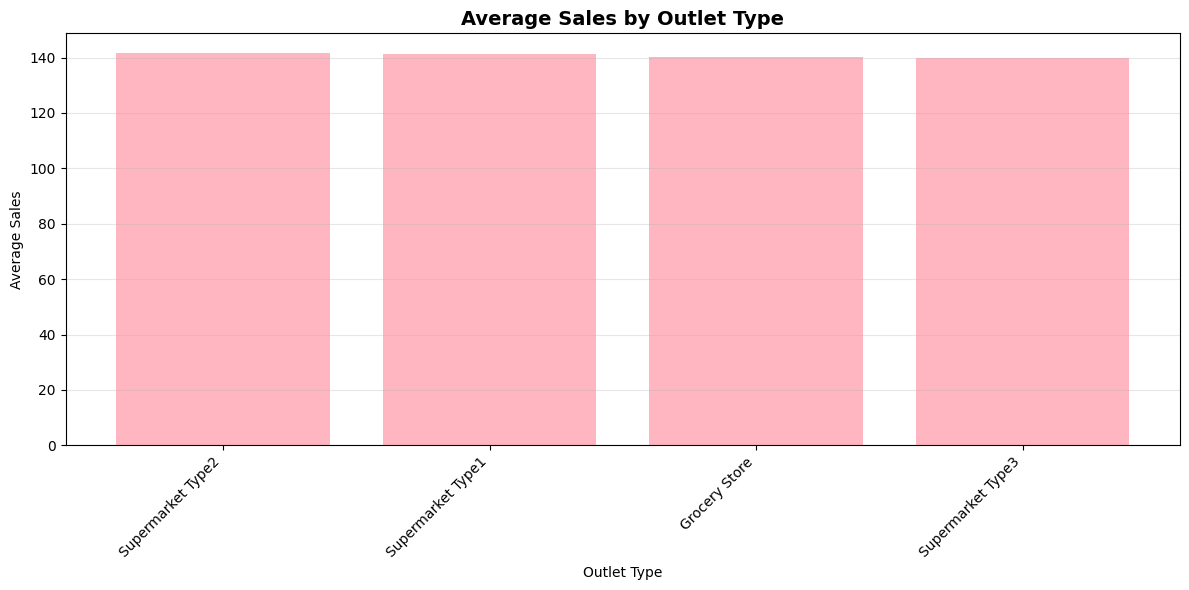

In [25]:
# 9. Sales by Outlet Type
plt.figure(figsize=(12, 6))
outlet_type_sales = df.groupby('Outlet Type')['Sales'].mean().sort_values(ascending=False)
plt.bar(range(len(outlet_type_sales)), outlet_type_sales.values, color='lightpink')
plt.title('Average Sales by Outlet Type', fontsize=14, fontweight='bold')
plt.xlabel('Outlet Type')
plt.ylabel('Average Sales')
plt.xticks(range(len(outlet_type_sales)), outlet_type_sales.index, rotation=45, ha='right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

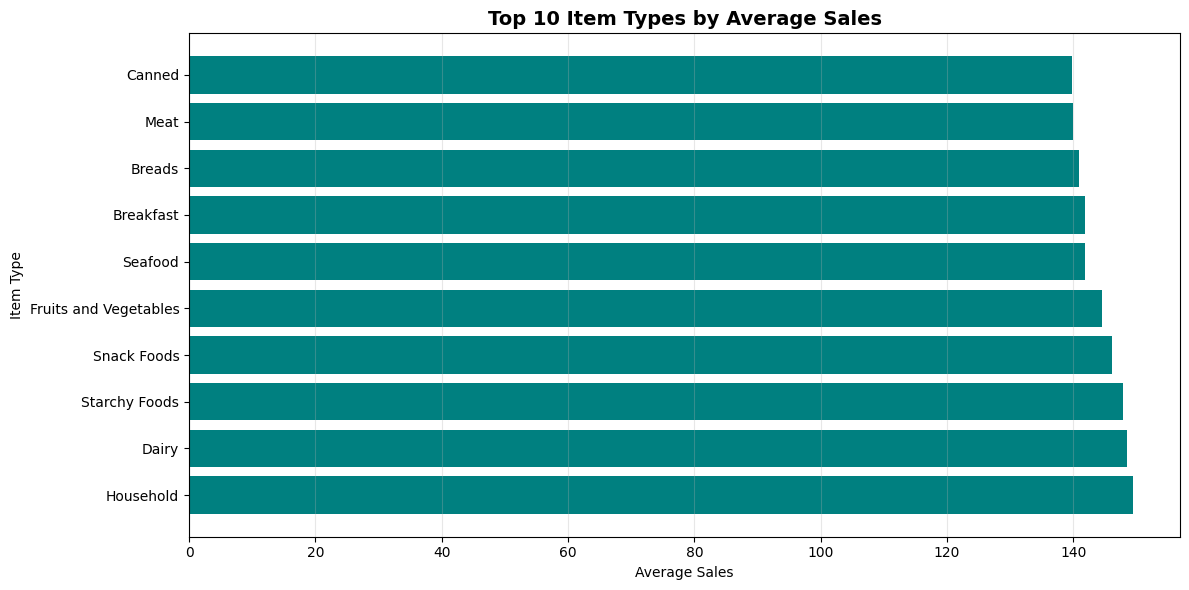

In [26]:
# 10. Top 10 Items by Sales Performance
plt.figure(figsize=(12, 6))
item_avg_sales = df.groupby('Item Type')['Sales'].mean().sort_values(ascending=False).head(10)
plt.barh(range(len(item_avg_sales)), item_avg_sales.values, color='teal')
plt.title('Top 10 Item Types by Average Sales', fontsize=14, fontweight='bold')
plt.xlabel('Average Sales')
plt.ylabel('Item Type')
plt.yticks(range(len(item_avg_sales)), item_avg_sales.index)
plt.grid(True, alpha=0.3, axis='x')
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Outlet Size Distribution')

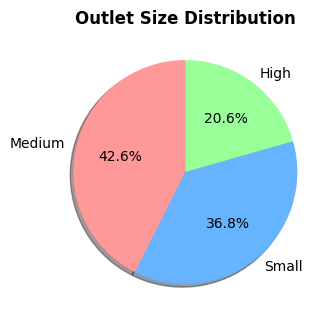

In [27]:
# 1. Pie Chart - Outlet Size Distribution
plt.figure(figsize=(10, 8))
outlet_size_counts = df['Outlet Size'].value_counts()
colors_pie = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']

plt.subplot(2, 2, 1)
plt.pie(outlet_size_counts.values, labels=outlet_size_counts.index, autopct='%1.1f%%', 
        colors=colors_pie, startangle=90, shadow=True)
plt.title('Outlet Size Distribution', fontsize=12, fontweight='bold')

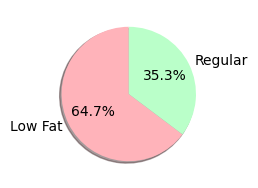

In [28]:
# 2. Donut Chart - Item Fat Content
plt.subplot(2, 2, 2)
fat_content_counts = df['Item Fat Content'].value_counts()
wedges, texts, autotexts = plt.pie(fat_content_counts.values, labels=fat_content_counts.index, 
                                   autopct='%1.1f%%', colors=['#ffb3ba', '#baffc9'], 
                                   startangle=90, shadow=True)

NameError: name 'Circle' is not defined

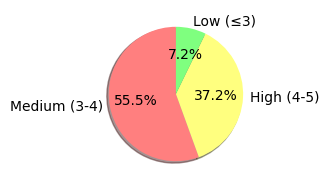

In [30]:
# 4. Donut Chart - Rating Categories
plt.subplot(2, 2, 4)
# Create rating categories
df['Rating_Category'] = pd.cut(df['Rating'], bins=[0, 3, 4, 5], labels=['Low (≤3)', 'Medium (3-4)', 'High (4-5)'])
rating_cat_counts = df['Rating_Category'].value_counts()
wedges, texts, autotexts = plt.pie(rating_cat_counts.values, labels=rating_cat_counts.index, 
                                   autopct='%1.1f%%', colors=['#ff7f7f', '#ffff7f', '#7fff7f'], 
                                   startangle=90, shadow=True)
centre_circle = Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(centre_circle)
plt.title('Rating Categories\n(Donut Chart)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

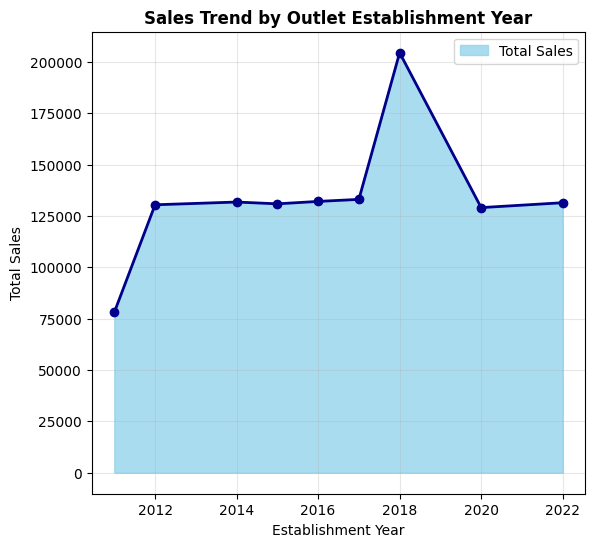

In [31]:
# 5. Area Chart - Sales by Outlet Establishment Year
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
yearly_sales = df.groupby('Outlet Establishment Year')['Sales'].sum().reset_index()
plt.fill_between(yearly_sales['Outlet Establishment Year'], yearly_sales['Sales'], 
                 alpha=0.7, color='skyblue', label='Total Sales')
plt.plot(yearly_sales['Outlet Establishment Year'], yearly_sales['Sales'], 
         color='darkblue', linewidth=2, marker='o')
plt.title('Sales Trend by Outlet Establishment Year', fontsize=12, fontweight='bold')
plt.xlabel('Establishment Year')
plt.ylabel('Total Sales')
plt.grid(True, alpha=0.3)
plt.legend()

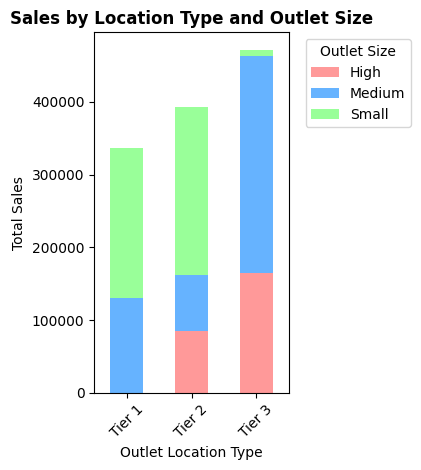

In [32]:
# 6. Stacked Bar Chart - Sales by Location and Size
plt.subplot(1, 2, 2)
pivot_data = df.groupby(['Outlet Location Type', 'Outlet Size'])['Sales'].sum().unstack(fill_value=0)
pivot_data.plot(kind='bar', stacked=True, ax=plt.gca(), color=['#ff9999', '#66b3ff', '#99ff99'])
plt.title('Sales by Location Type and Outlet Size', fontsize=12, fontweight='bold')
plt.xlabel('Outlet Location Type')
plt.ylabel('Total Sales')
plt.legend(title='Outlet Size', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Average Sales Heatmap: Location Type vs Outlet Size')

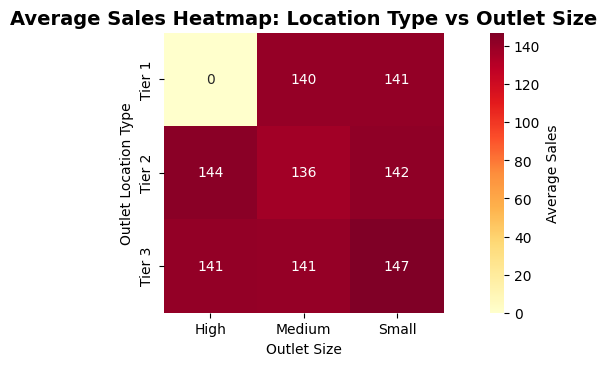

In [33]:
# 8. Heatmap - Sales Performance Matrix
plt.figure(figsize=(12, 8))

plt.subplot(2, 1, 1)
# Create pivot table for heatmap
heatmap_data = df.groupby(['Outlet Location Type', 'Outlet Size'])['Sales'].mean().unstack(fill_value=0)
sns.heatmap(heatmap_data, annot=True, cmap='YlOrRd', fmt='.0f', 
            cbar_kws={'label': 'Average Sales'}, square=True)
plt.title('Average Sales Heatmap: Location Type vs Outlet Size', fontsize=14, fontweight='bold')

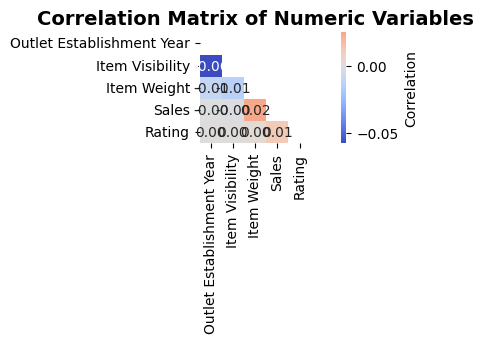

In [34]:
# 9. Correlation Heatmap
plt.subplot(2, 1, 2)
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numeric_cols].corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, fmt='.2f', cbar_kws={'label': 'Correlation'})
plt.title('Correlation Matrix of Numeric Variables', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

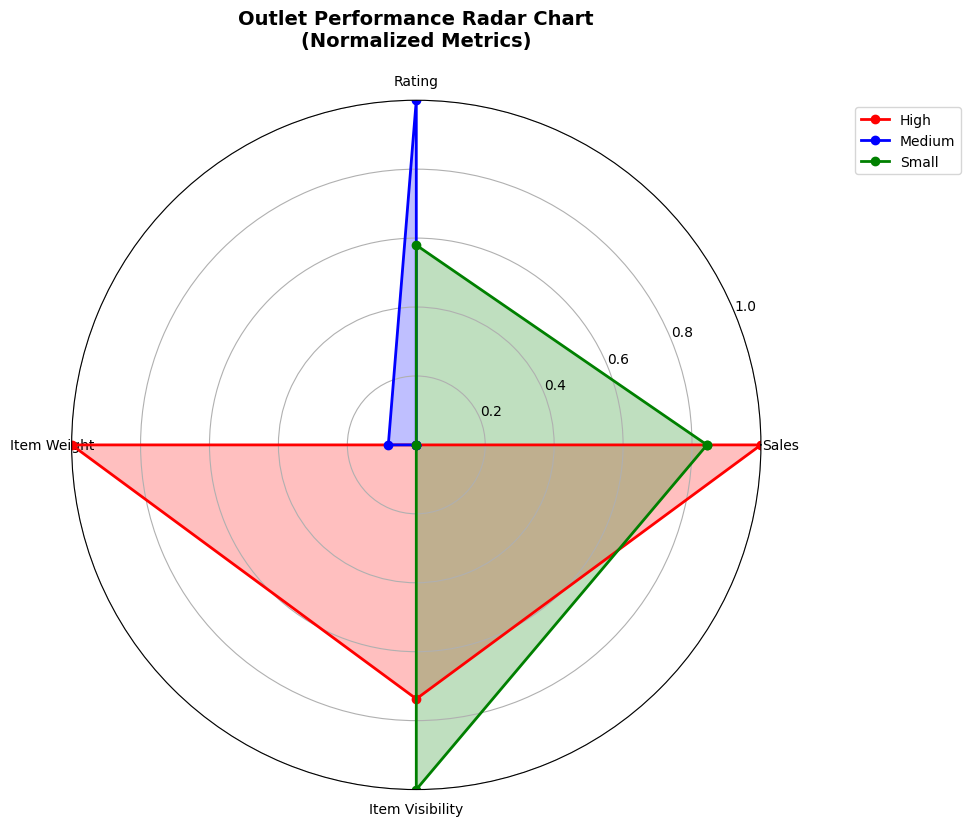

In [37]:
# 10. Radar Chart - Outlet Performance Metrics
def create_radar_chart():
    # Calculate metrics by outlet size
    metrics = df.groupby('Outlet Size').agg({
        'Sales': 'mean',
        'Rating': 'mean',
        'Item Weight': 'mean',
        'Item Visibility': 'mean'
    }).reset_index()
    
    # Normalize the data (0-1 scale)
    for col in ['Sales', 'Rating', 'Item Weight', 'Item Visibility']:
        metrics[col] = (metrics[col] - metrics[col].min()) / (metrics[col].max() - metrics[col].min())
    
    # Set up the radar chart
    categories = ['Sales', 'Rating', 'Item Weight', 'Item Visibility']
    N = len(categories)
    
    # Create angles for each category
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]  # Complete the circle
    
    fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))
    
    colors = ['red', 'blue', 'green']
    for i, outlet_size in enumerate(metrics['Outlet Size']):
        values = metrics.iloc[i][['Sales', 'Rating', 'Item Weight', 'Item Visibility']].values.tolist()
        values += values[:1]  # Complete the circle
        
        ax.plot(angles, values, 'o-', linewidth=2, label=outlet_size, color=colors[i])
        ax.fill(angles, values, alpha=0.25, color=colors[i])
    
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    ax.set_ylim(0, 1)
    ax.set_title('Outlet Performance Radar Chart\n(Normalized Metrics)', 
                 fontsize=14, fontweight='bold', pad=20)
    ax.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))
    ax.grid(True)
    
    plt.tight_layout()
    plt.show()

create_radar_chart()

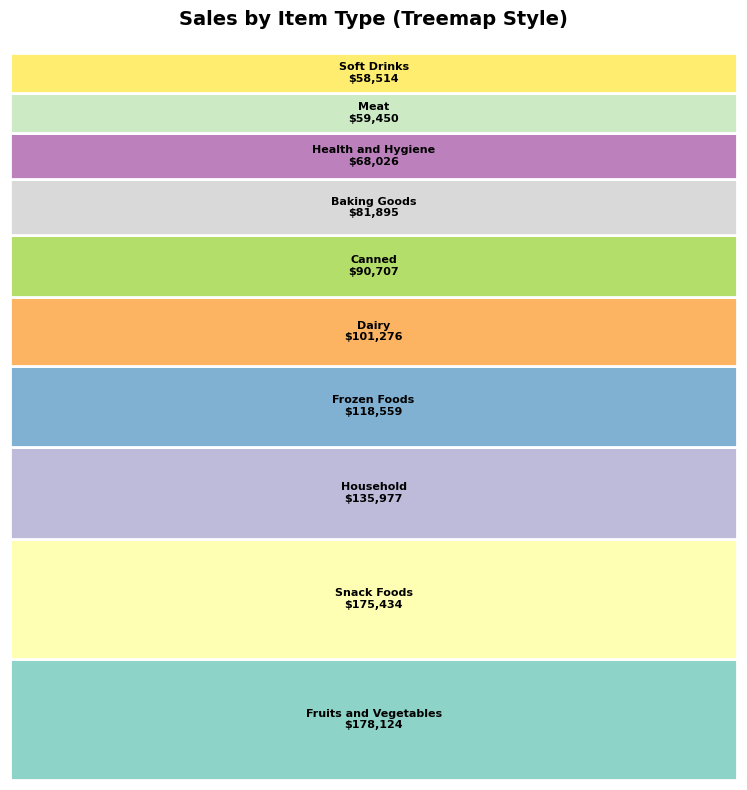

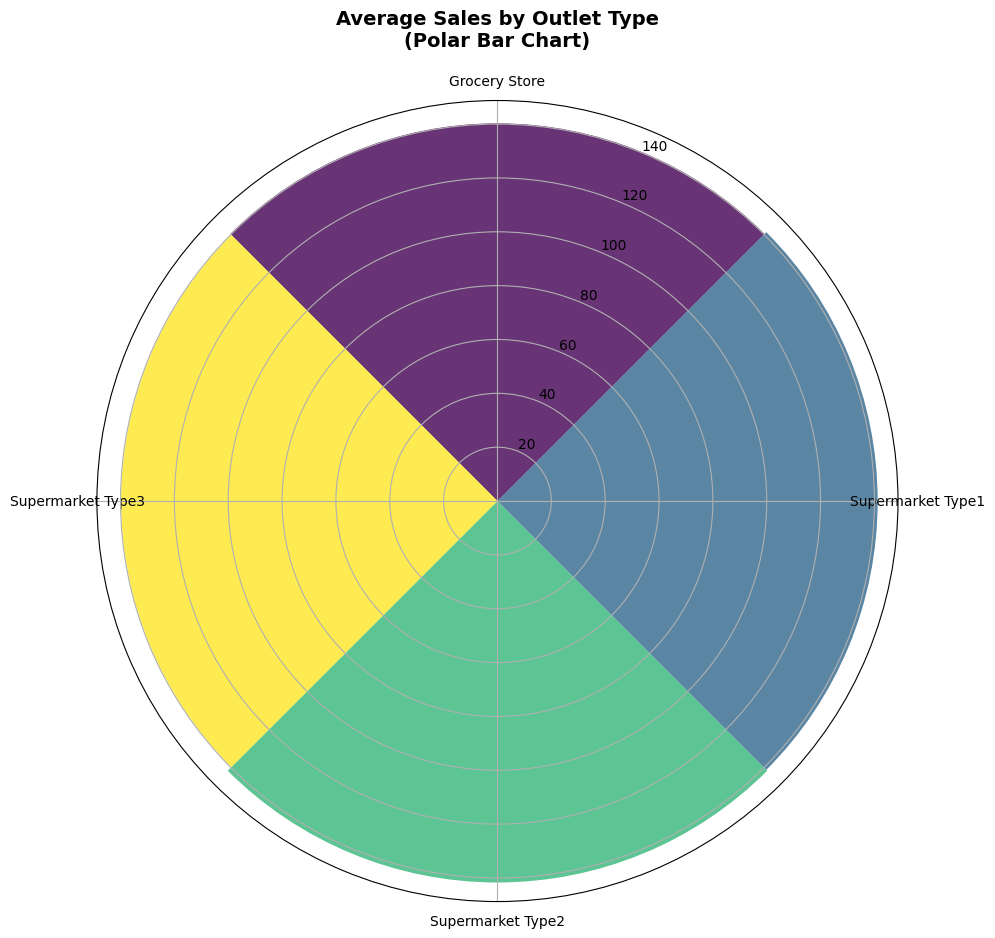

In [38]:
# 11. Treemap-style using matplotlib
def create_treemap():
    # Get item type sales data
    item_sales = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False).head(10)
    
    fig, ax = plt.subplots(figsize=(12, 8))
    
    # Calculate sizes and positions
    total_sales = item_sales.sum()
    sizes = item_sales.values / total_sales
    
    # Create a simple grid-based treemap
    colors = plt.cm.Set3(np.linspace(0, 1, len(item_sales)))
    
    # Simple rectangular treemap
    y_pos = 0
    for i, (item, sales) in enumerate(item_sales.items()):
        height = sizes[i] * 10
        rect = plt.Rectangle((0, y_pos), 10, height, facecolor=colors[i], 
                           edgecolor='white', linewidth=2)
        ax.add_patch(rect)
        
        # Add text
        ax.text(5, y_pos + height/2, f'{item}\n${sales:,.0f}', 
                ha='center', va='center', fontweight='bold', fontsize=8)
        
        y_pos += height
    
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.set_aspect('equal')
    ax.axis('off')
    ax.set_title('Sales by Item Type (Treemap Style)', fontsize=14, fontweight='bold', pad=20)
    
    plt.tight_layout()
    plt.show()

create_treemap()

# =============================================================================
# POLAR BAR CHART
# =============================================================================

# 12. Polar Bar Chart - Outlet Types
fig, ax = plt.subplots(figsize=(10, 10), subplot_kw=dict(projection='polar'))

outlet_type_sales = df.groupby('Outlet Type')['Sales'].mean()
theta = np.linspace(0.0, 2 * np.pi, len(outlet_type_sales), endpoint=False)
radii = outlet_type_sales.values
width = 2 * np.pi / len(outlet_type_sales)

bars = ax.bar(theta, radii, width=width, alpha=0.8)

# Color bars differently
colors = plt.cm.viridis(np.linspace(0, 1, len(bars)))
for bar, color in zip(bars, colors):
    bar.set_facecolor(color)

ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_thetagrids(np.degrees(theta), outlet_type_sales.index)
ax.set_title('Average Sales by Outlet Type\n(Polar Bar Chart)', 
             fontsize=14, fontweight='bold', pad=20)

plt.tight_layout()
plt.show()